In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [4]:
ri.set_lo(900.0)

In [5]:
ri.set_tone_freqs(np.array([951.]),nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 951.])

In [6]:
ri.fft_bins

array([[1632]])

In [7]:
ri._sync(loopback=True)

In [8]:
ri.set_fft_gain(1)

In [19]:
ri.fft_bins[0,0]=812

In [20]:
ri.select_fft_bins([0])

In [53]:
ri.r.write_int('debug',0)

In [45]:
d,addr = ri.get_data(2,demod=False)

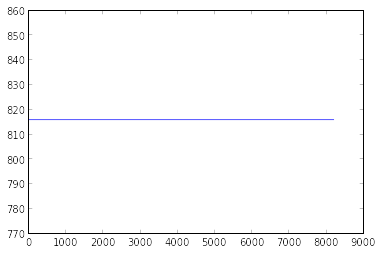

In [48]:
plot(d.imag)

In [54]:
data = []
for b in range(2**14):
    ri.fft_bins[0,0] = b
    ri.select_fft_bins([0])
    d,addr = ri.get_data(2,demod=False)
    data.append(d)
    print b,

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

IndexError: index 0 is out of bounds for axis 0 with size 0

In [55]:
len(data)

16382

In [56]:
dmag = np.array([np.abs(x).mean() for x in data])

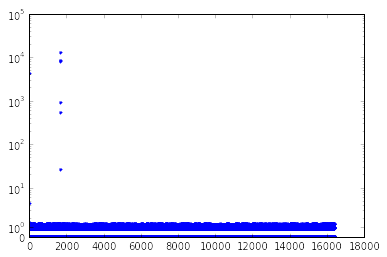

In [63]:
plot(dmag,'.')
yscale('symlog')

In [60]:
ri.fft_bin_to_index(np.array([1632]))

array([1632])

In [61]:
dmag.argmax()

1632

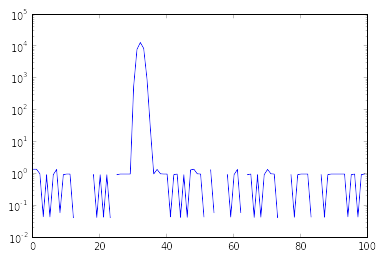

In [65]:
semilogy(dmag[1600:1700])

In [66]:
ri.set_tone_freqs(np.array([951.12345]),nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 951.12304688])

In [ ]:
data2 = []
for b in range(2**14):
    ri.fft_bins[0,0] = b
    ri.select_fft_bins([0])
    d,addr = ri.get_data(2,demod=False)
    data2.append(d)
    print b,

0 1 2 3 4 5 6 7 8 9 10 11 detected mcnt overflow None 17531273 0 2048 0 16 17531273
12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 detected mcnt overflow None 17531305 0 2048 0 16 17531305
76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 detected mcnt overflow None 17531337 0 2048 0 16 17531337
140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 detected mcnt overflow None 17531369 0 2048 0 16 17531369
204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 21

In [68]:
dmag2 = np.array([np.abs(x).mean() for x in data2])

(1600, 1700)

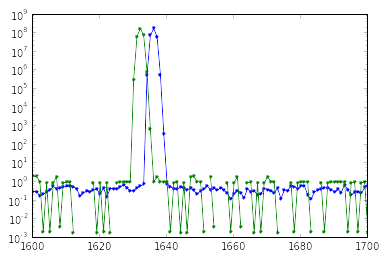

In [74]:
semilogy(dmag2**2,'.-')
semilogy(dmag**2,'.-')
xlim(1600,1700)

In [75]:
ri.set_tone_freqs(np.array([851.]),nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 851.])

In [76]:
ri.fft_bins

array([[14816]])

In [77]:
ri.fpga_fft_readout_indexes

array([14816])

In [23]:
ri.fft_bins[0,0]=16383

In [24]:
ri.select_fft_bins([0])

In [25]:
ri.fpga_fft_readout_indexes

array([16383])

In [26]:
(16382-4) //2

8189

In [27]:
ri.r.read_int('chans')

16379

In [28]:
ri.r.write_int('debug',1)

In [29]:
d,addr = ri.get_data(2,demod=False)

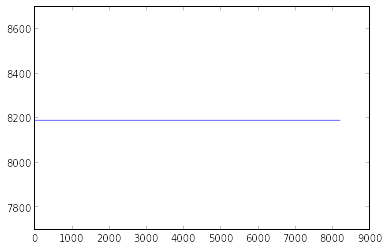

In [30]:
plot(d.imag)

In [21]:
d.imag

array([[ 8191.],
       [ 8191.],
       [ 8191.],
       ..., 
       [ 8191.],
       [ 8191.],
       [ 8191.]], dtype=float32)

In [22]:
16382//2

8191

In [99]:
ri

In [105]:
(ri.fpga_fft_readout_indexes//2 + 1) % (ri.nfft//2)

array([0])